<a href="https://colab.research.google.com/github/khimaja/Uber-analysis/blob/main/uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries and overview of the dataset

In [1]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help me with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

Loading the dataset

In [3]:
data = pd.read_csv('/content/uber.csv')

In [4]:
df = data.copy()

In [5]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


View the last 5 rows of the dataset

In [6]:
df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


Checking the shape of the dataset

In [7]:
df.shape

(29101, 13)

Checking the info()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


Summary of the data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,29101.0,47.669042,19.814969,2.0,32.0,46.0,64.500000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


By default, the describe() function shows the summary of numeric variables only. Let's check the summary of non-numeric variables.

In [10]:
df.describe(exclude = 'number').T

,count,unique,top,freq
pickup_dt,29101,4343,2015-06-30 23:00:00,7
borough,26058,6,Bronx,4343
hday,29101,2,N,27980


Let's check the count of each unique category in each of the categorical variables.

In [11]:
# Making a list of all categorical variables
cat_col = ['borough', 'hday']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())

    print('-' * 50)

borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: count, dtype: int64
--------------------------------------------------
hday
N    27980
Y     1121
Name: count, dtype: int64
--------------------------------------------------


Extracting date parts from pickup date

In [12]:
# Converting pickup_dt datatype to datetime
df.pickup_dt = pd.to_datetime(df.pickup_dt)

# Extracting date parts from pickup_dt
df['start_year'] = df.pickup_dt.dt.year

df['start_month'] = df.pickup_dt.dt.month_name()

df['start_hour'] = df.pickup_dt.dt.hour

df['start_day'] = df.pickup_dt.dt.day

df['week_day'] = df.pickup_dt.dt.day_name()

In [13]:
# Removing pickup_dt column as it will not be required for further analysis
df.drop('pickup_dt', axis = 1, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   borough      26058 non-null  object 
 1   pickups      29101 non-null  int64  
 2   spd          29101 non-null  float64
 3   vsb          29101 non-null  float64
 4   temp         29101 non-null  float64
 5   dewp         29101 non-null  float64
 6   slp          29101 non-null  float64
 7   pcp01        29101 non-null  float64
 8   pcp06        29101 non-null  float64
 9   pcp24        29101 non-null  float64
 10  sd           29101 non-null  float64
 11  hday         29101 non-null  object 
 12  start_year   29101 non-null  int32  
 13  start_month  29101 non-null  object 
 14  start_hour   29101 non-null  int32  
 15  start_day    29101 non-null  int32  
 16  week_day     29101 non-null  object 
dtypes: float64(9), int32(3), int64(1), object(4)
memory usage: 3.4+ MB


Missing value treatment

In [15]:
# Checking missing values
df.isna().sum()

,0
borough,3043
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0
pcp24,0


In [16]:
# Checking the missing values further
df.borough.value_counts(normalize=True, dropna = False)

,proportion
borough,
Bronx,0.149239
Brooklyn,0.149239
EWR,0.149239
Manhattan,0.149239
Queens,0.149239
Staten Island,0.149239
NaN,0.104567


In [17]:
# Replacing NaN with Unknown
df['borough'].fillna('Unknown', inplace = True)

In [18]:
df.borough.value_counts()

,count
borough,
Bronx,4343
Brooklyn,4343
EWR,4343
Manhattan,4343
Queens,4343
Staten Island,4343
Unknown,3043


In [19]:
df.isnull().sum()

,0
borough,0
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0
pcp24,0


Exploratory Data Analysis: Univariate

In [20]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # mean
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # median

    plt.show()

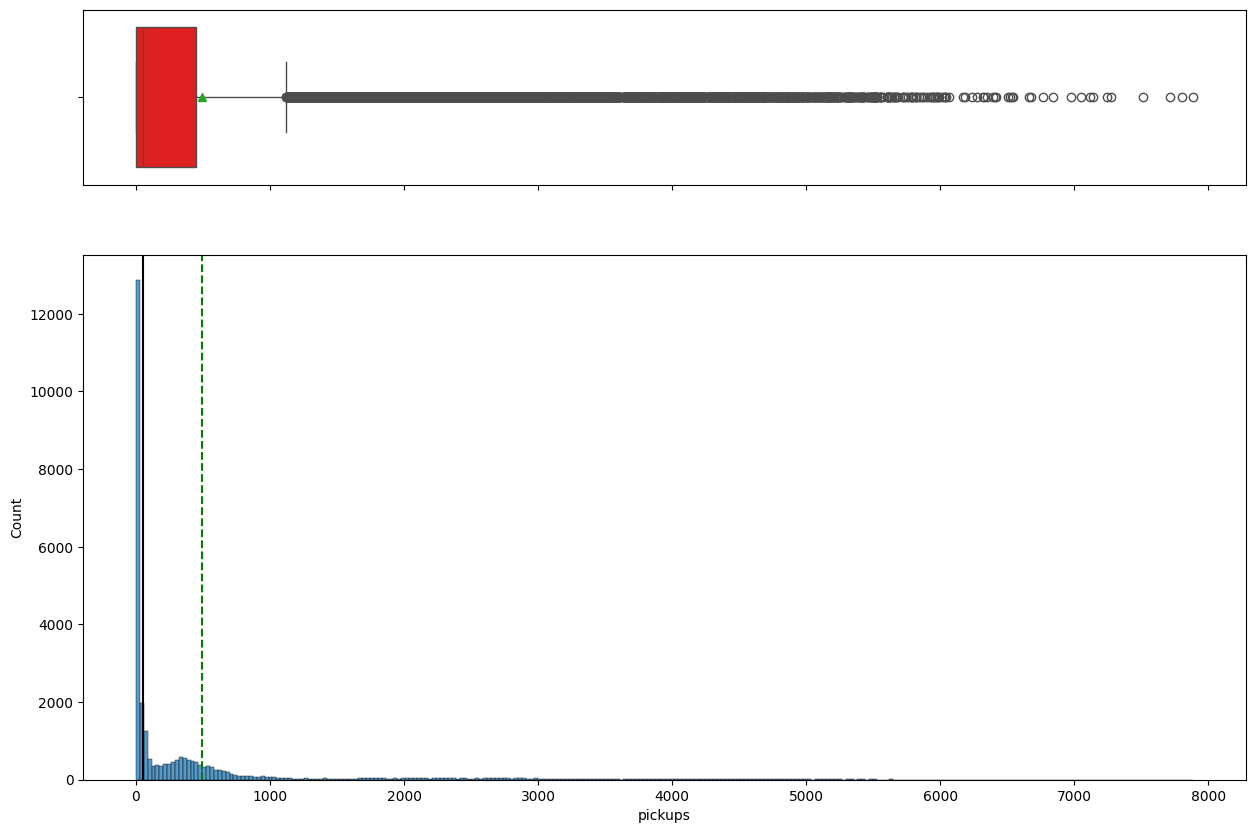

In [21]:
histogram_boxplot(df.pickups)

Observations on Visibility

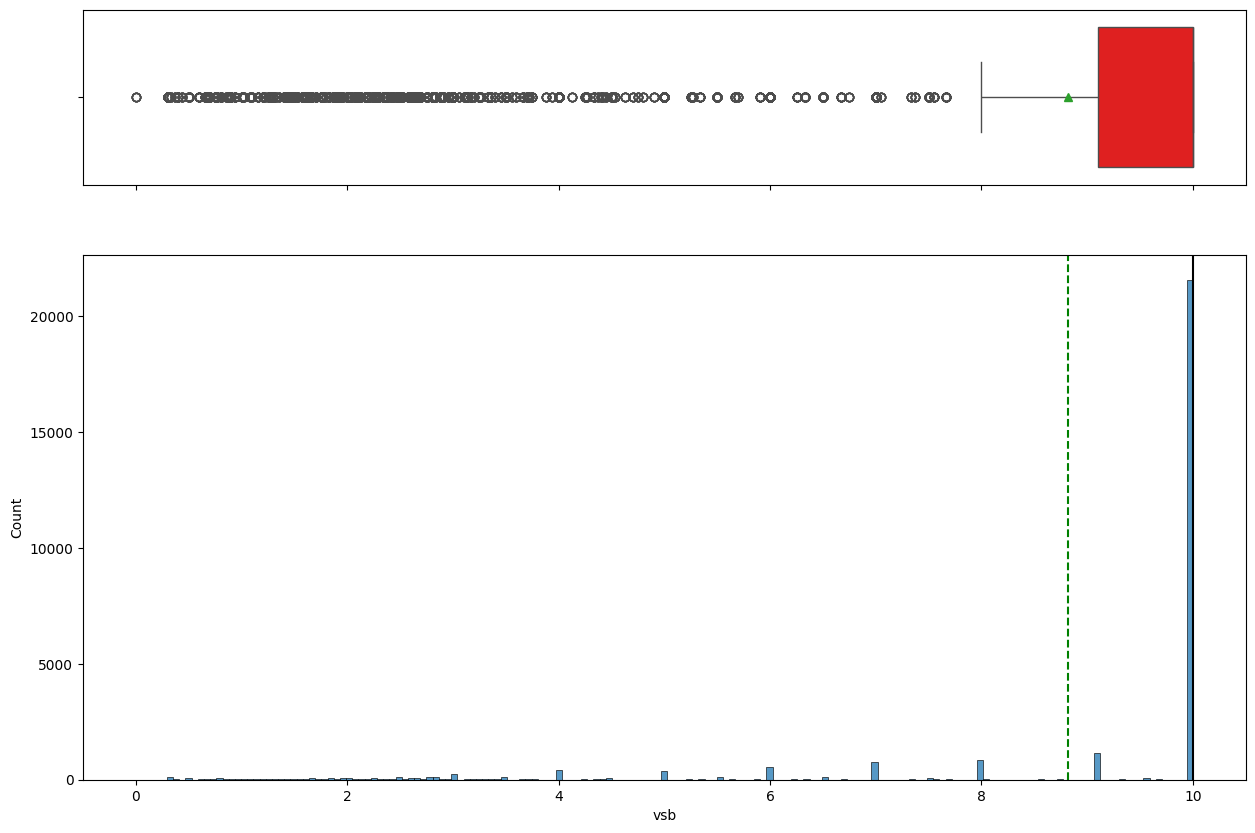

In [22]:
histogram_boxplot(df.vsb)

Observations on Snow Depth

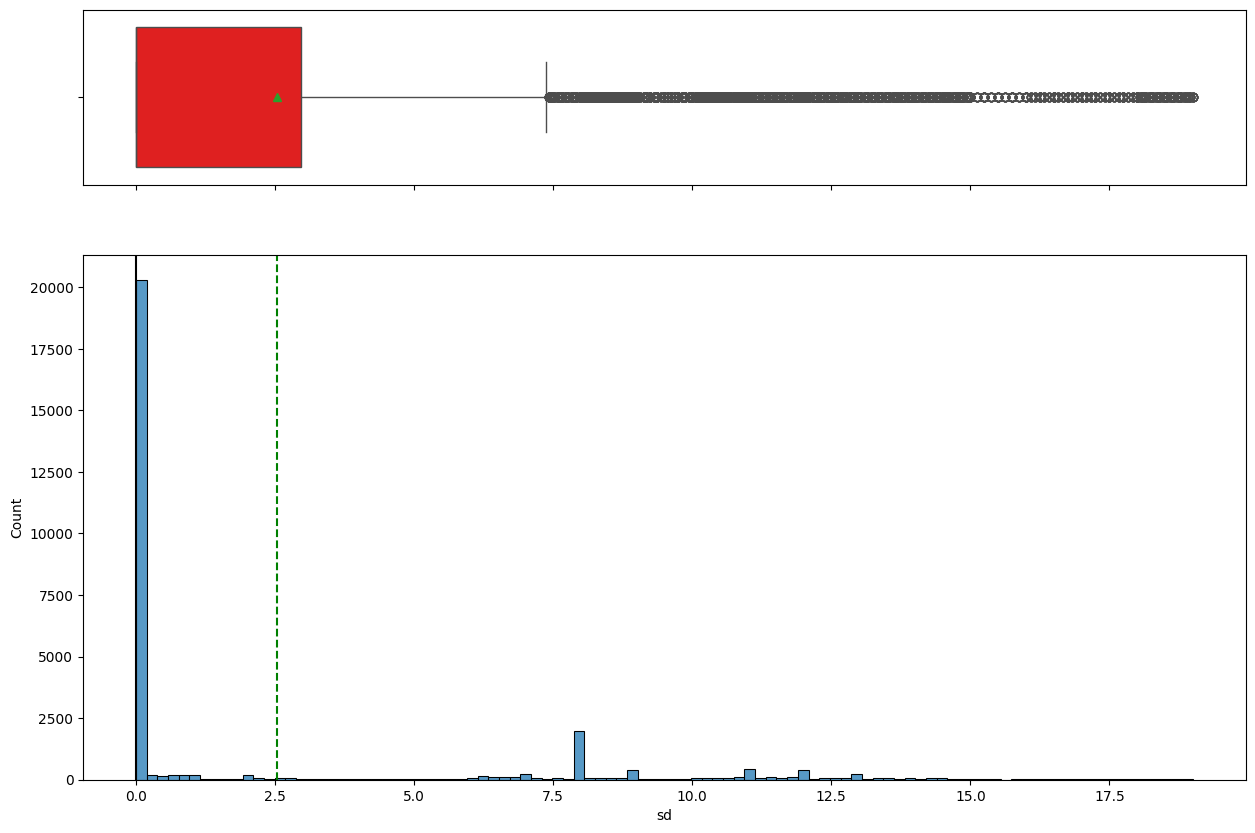

In [23]:
histogram_boxplot(df.sd)

exploring the categorical variables

In [24]:
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Converting the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

    plt.show()

Observations on holiday

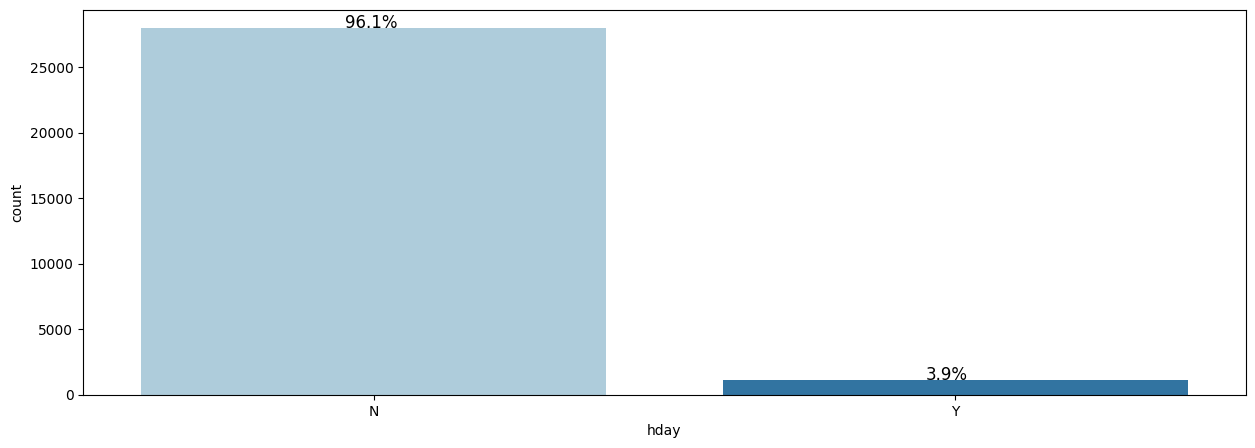

In [25]:
bar_perc(df, 'hday')

Relationship between Pickups and Holidays

In [26]:
df.groupby('hday')['pickups'].mean()

,pickups
hday,
N,492.339957
Y,437.199822


In [27]:
# Checking if the trend is similar across boroughs
df.groupby(by = ['borough','hday'])['pickups'].mean()

borough        hday
Bronx          N         50.771073
               Y         48.065868
Brooklyn       N        534.727969
               Y        527.011976
EWR            N          0.023467
               Y          0.041916
Manhattan      N       2401.302921
               Y       2035.928144
Queens         N        308.899904
               Y        320.730539
Staten Island  N          1.606082
               Y          1.497006
Unknown        N          2.057456
               Y          2.050420
Name: pickups, dtype: float64

Relationship between Pickups and Hour of the day across Boroughs

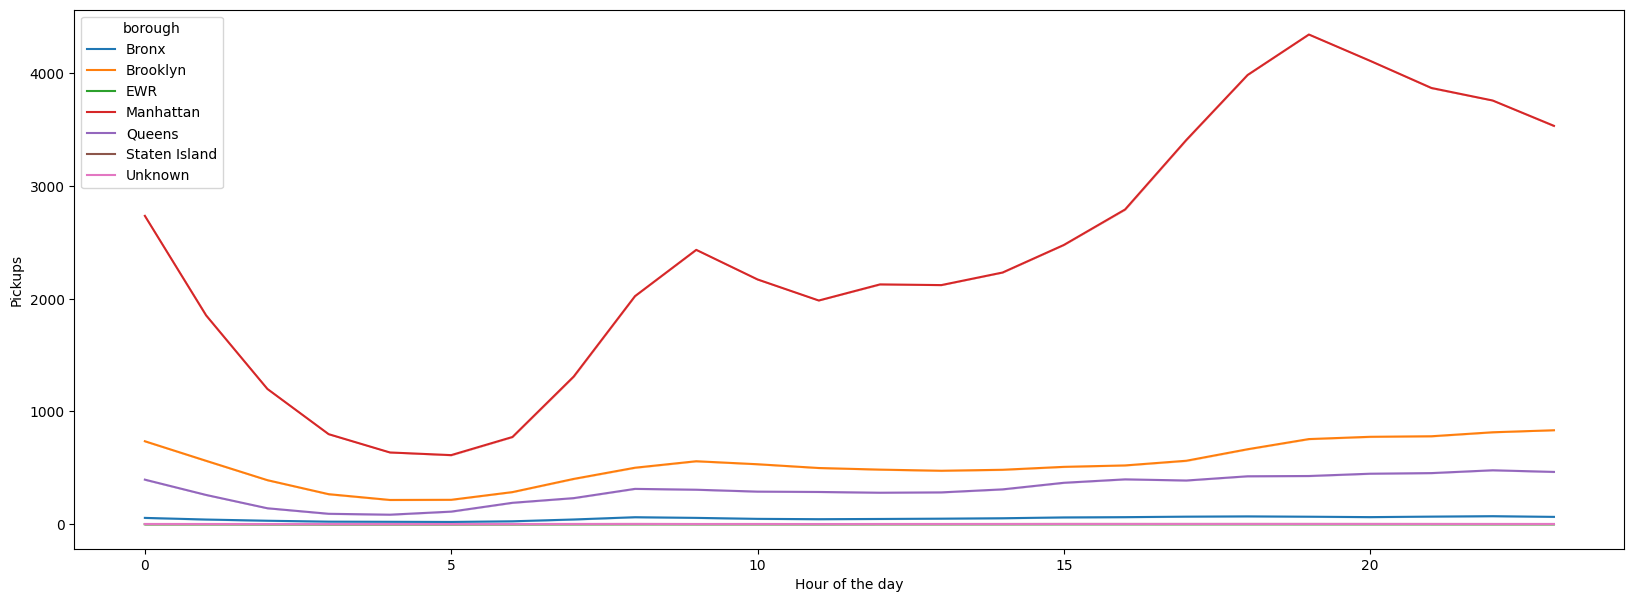

In [28]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = "start_hour", y = "pickups", ci = 0, data = df, hue = 'borough')
plt.ylabel('Pickups')
plt.xlabel('Hour of the day')
plt.show()

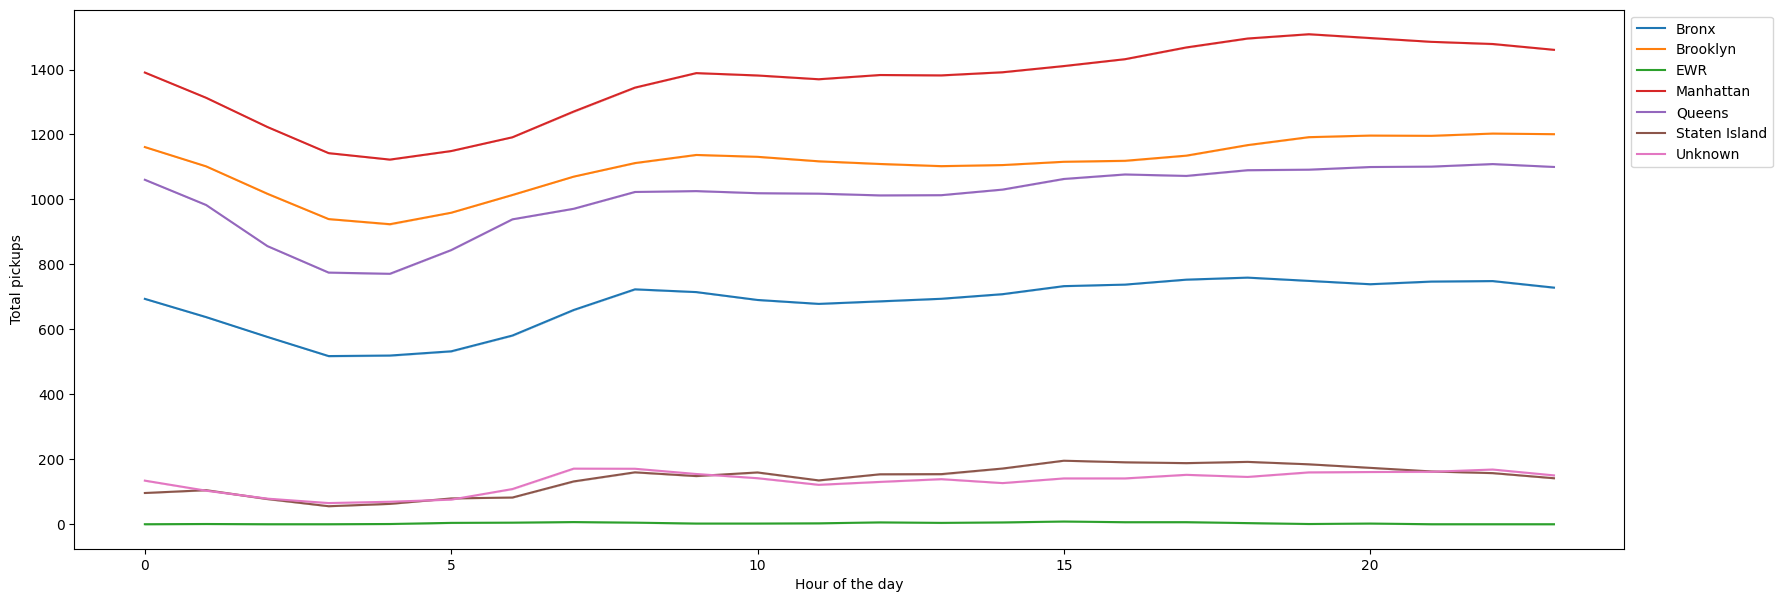

In [29]:
plt.figure(figsize = (20, 7))
sns.lineplot(x = df.start_hour, y = np.log1p(df.pickups), estimator ='sum', ci = 0, hue = df.borough)
plt.ylabel('Total pickups')
plt.xlabel('Hour of the day')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()